In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
import xgboost as xgb


In [290]:
df=pd.read_csv('C:/Users/Sushant/Desktop/AD Test/train.csv')

In [291]:
test=pd.read_csv('C:/Users/Sushant/Desktop/AD Test/test.csv')

In [292]:
df

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,UI_9185,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,No,0
1,UI_449,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,No,0
2,UI_9014,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,Low,No,0
3,UI_14987,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,Yes,0
4,UI_25532,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,Low,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19531,UI_13124,Never-married,Auto,Infomercial,Male,40,Primetime,United-States,0.027465,High,Yes,0
19532,UI_19649,Never-married,Political,Drama,Female,15,Morning,United-States,0.027465,High,Yes,1
19533,UI_9846,Married-civ-spouse,Other,Comedy,Female,55,Primetime,United-States,0.027465,Low,Yes,0
19534,UI_10800,Never-married,Political,Comedy,Male,38,Primetime,United-States,0.027465,High,Yes,0


In [293]:
test

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,UI_8772,Never-married,Entertainment,Infomercial,Female,40,Primetime,United-States,0.027465,High,Yes
1,UI_13139,Divorced,Auto,Comedy,Female,40,Primetime,United-States,0.027465,Low,No
2,UI_15381,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,High,No
3,UI_15503,Never-married,Auto,Comedy,Male,30,Primetime,United-States,0.027465,High,Yes
4,UI_16556,Never-married,Political,Comedy,Male,70,Morning,United-States,0.027465,Low,No
...,...,...,...,...,...,...,...,...,...,...,...
6507,UI_2716,Never-married,Political,Drama,Male,40,Primetime,International,0.027465,Low,Yes
6508,UI_17670,Divorced,Entertainment,Comedy,Female,40,Primetime,United-States,0.027465,Low,Yes
6509,UI_16871,Married-civ-spouse,Pharma,Comedy,Male,40,Primetime,United-States,0.027465,High,Yes
6510,UI_2667,Divorced,Auto,Comedy,Female,35,Primetime,United-States,0.027465,Low,Yes


In [294]:
test.isnull().sum()

UserID                               0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
dtype: int64

In [295]:
df.isnull().sum()

UserID                               0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

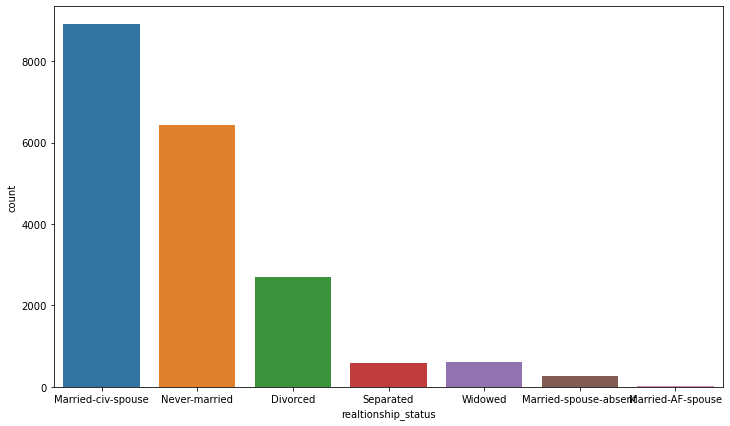

In [296]:
plt.figure(figsize=(12,7))
sns.countplot(x='realtionship_status',data=df)

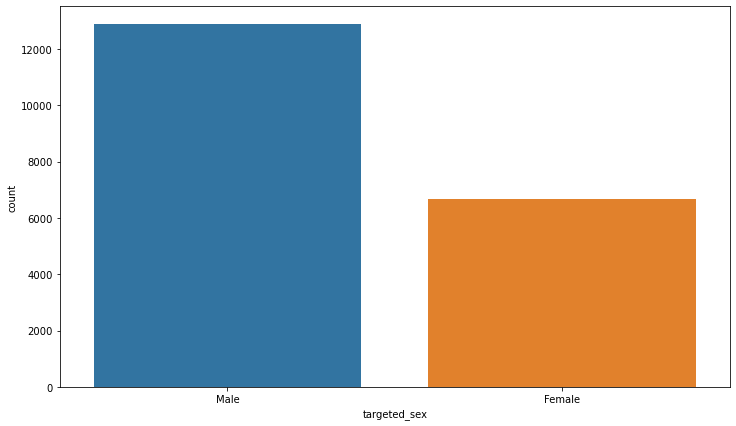

In [297]:
plt.figure(figsize=(12,7))
sns.countplot(x='targeted_sex',data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F429B1CB48>]],
      dtype=object)

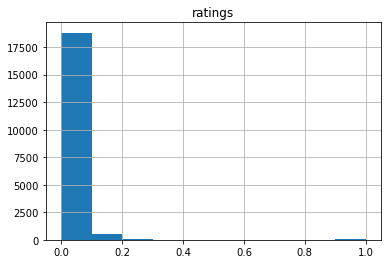

In [298]:
df.hist('ratings')

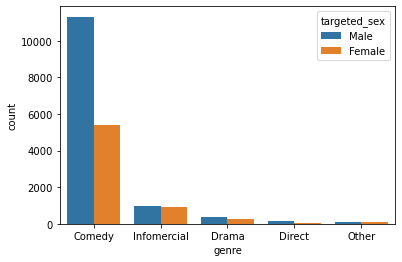

In [299]:
sns.countplot(x='genre',hue='targeted_sex',data=df)

In [300]:
df['industry'].value_counts()

Pharma           7735
Auto             5058
Political        3039
Entertainment    2064
Other            1031
ClassAction       609
Name: industry, dtype: int64

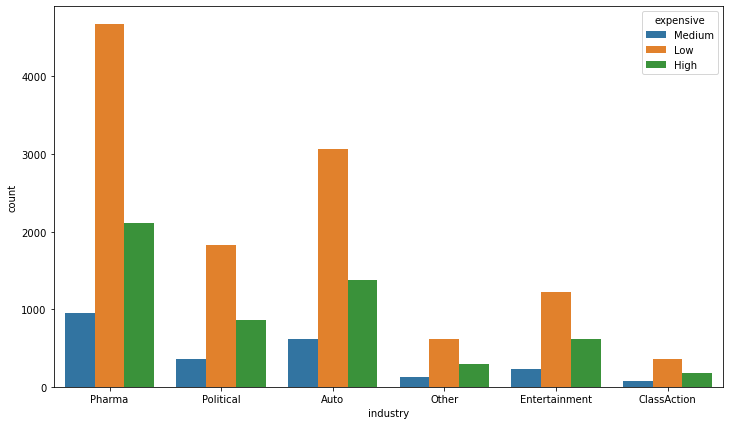

In [301]:
##the cost range of the product describe in the advertise by the industry.
plt.figure(figsize=(12,7))
sns.countplot(x='industry',hue='expensive',data=df)

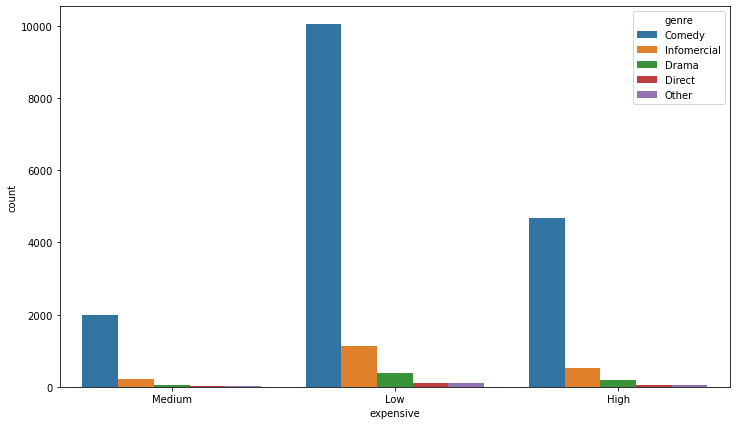

In [302]:
plt.figure(figsize=(12,7))
sns.countplot(x='expensive',hue='genre',data=df)

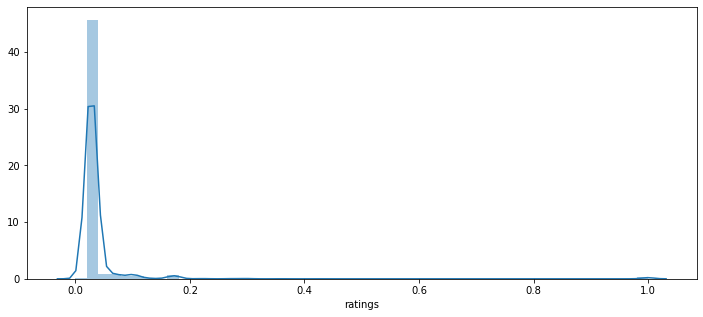

In [303]:

plt.figure(figsize=(12,5))
sns.distplot(df['ratings'])
plt.show()

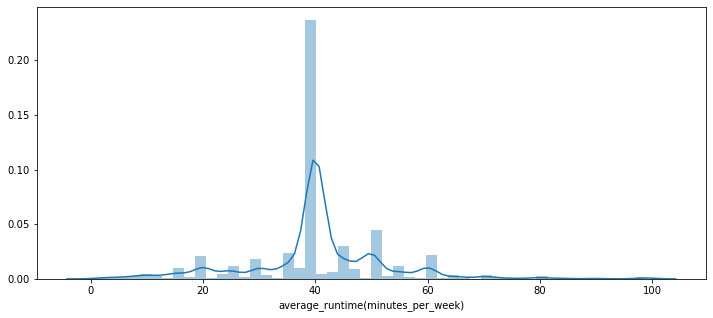

In [304]:

plt.figure(figsize=(12,5))
sns.distplot(df['average_runtime(minutes_per_week)'])
plt.show()

In [305]:
df['money_back_guarantee'].value_counts()

Yes    9788
No     9748
Name: money_back_guarantee, dtype: int64

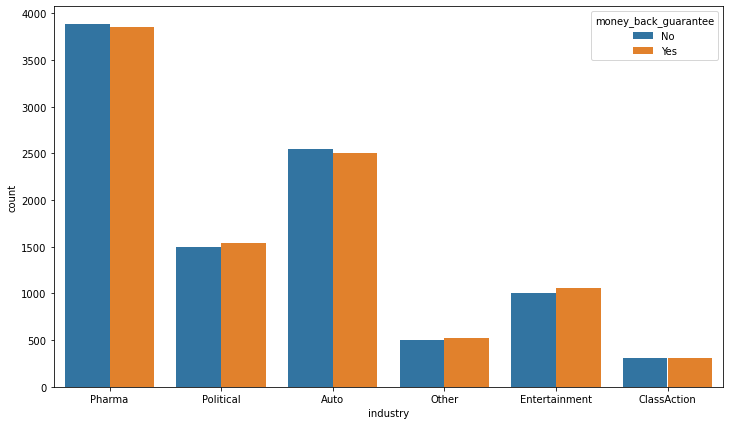

In [306]:
plt.figure(figsize=(12,7))
sns.countplot(x='industry',hue='money_back_guarantee',data=df)

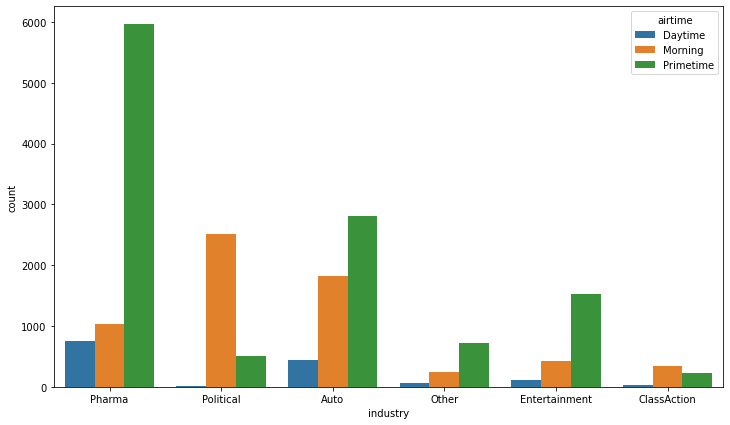

In [307]:
plt.figure(figsize=(12,7))
sns.countplot(x='industry',hue='airtime',data=df)

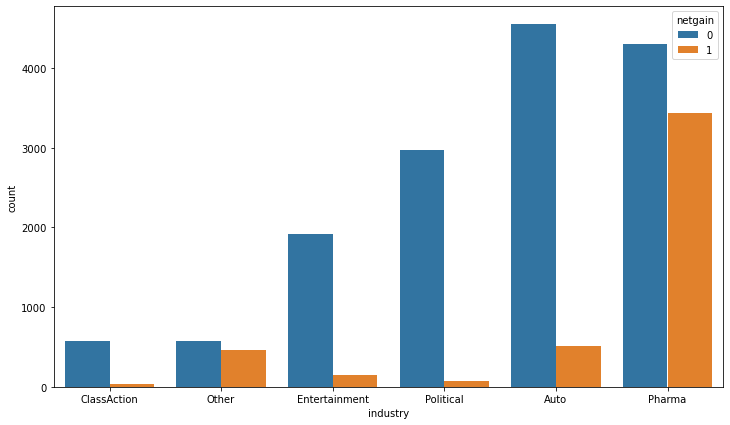

In [308]:
plt.figure(figsize=(12,7))
sns.countplot(x='industry',hue='netgain',data=df,order=df['industry'].value_counts().sort_values().index);

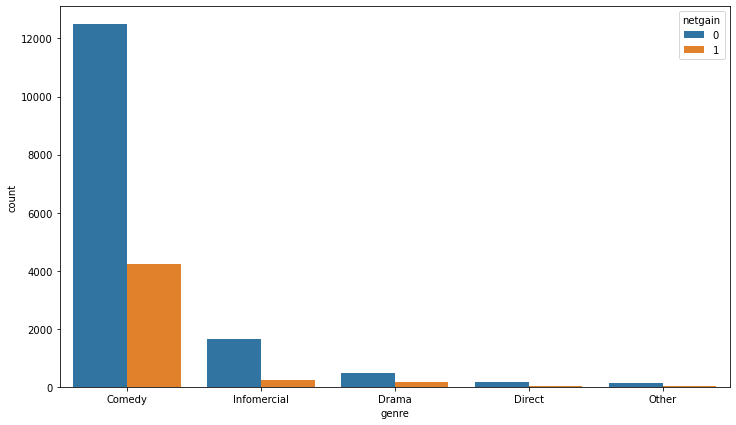

In [309]:
plt.figure(figsize=(12,7))
sns.countplot(x='genre',hue='netgain',data=df)

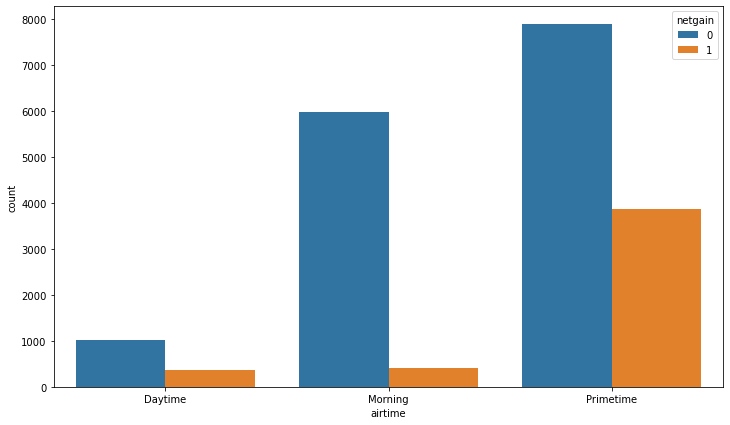

In [310]:
plt.figure(figsize=(12,7))
sns.countplot(x='airtime',hue='netgain',data=df)


C:\Users\Sushant\miniconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 864x720 with 0 Axes>

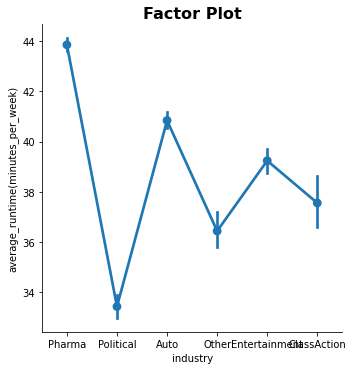

In [311]:
plt.figure(figsize=(12,10))
sns.factorplot(x='industry',y='average_runtime(minutes_per_week)',data=df)
plt.title('Factor Plot', weight='bold', fontsize=16)
plt.show()

C:\Users\Sushant\miniconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 864x720 with 0 Axes>

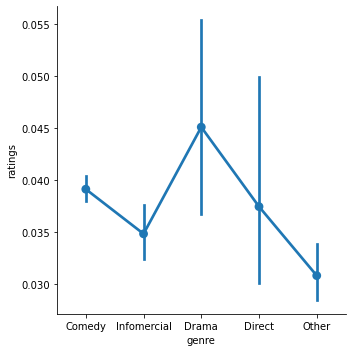

In [312]:
plt.figure(figsize=(12,10))
sns.factorplot(x='genre',y='ratings',data=df)

C:\Users\Sushant\miniconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 864x720 with 0 Axes>

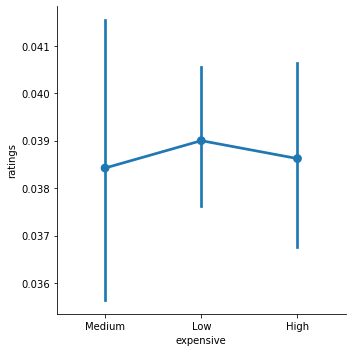

In [313]:
plt.figure(figsize=(12,10))
sns.factorplot(x='expensive',y='ratings',data=df)

In [314]:

##for train data
le1 = preprocessing.LabelEncoder()
le1.fit(df['realtionship_status'])
list(le1.classes_)
df['realtionship_status'] = le1.transform(df['realtionship_status'])
# train.head()

le2 = preprocessing.LabelEncoder()
le2.fit(df['industry'])
list(le2.classes_)
df['industry'] = le2.transform(df['industry'])

le3 = preprocessing.LabelEncoder()
le3.fit(df['genre'])
list(le3.classes_)
df['genre'] = le3.transform(df['genre'])

le4 = preprocessing.LabelEncoder()
le4.fit(df['targeted_sex'])
list(le4.classes_)
df['targeted_sex'] = le4.transform(df['targeted_sex'])

le5 = preprocessing.LabelEncoder()
le5.fit(df['airtime'])
list(le5.classes_)
df['airtime'] = le5.transform(df['airtime'])

le6 = preprocessing.LabelEncoder()
le6.fit(df['airlocation'])
list(le6.classes_)
df['airlocation'] = le6.transform(df['airlocation'])

le7 = preprocessing.LabelEncoder()
le7.fit(df['expensive'])
list(le7.classes_)
df['expensive'] = le7.transform(df['expensive'])

le8 = preprocessing.LabelEncoder()
le8.fit(df['money_back_guarantee'])
list(le8.classes_)
df['money_back_guarantee'] = le8.transform(df['money_back_guarantee'])
df.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,UI_9185,2,4,0,1,40,0,39,0.027465,2,0,0
1,UI_449,4,5,0,1,35,1,19,0.027465,1,0,0
2,UI_9014,4,0,0,1,40,1,39,0.027465,1,0,0
3,UI_14987,2,4,3,1,40,2,39,0.027465,1,1,0
4,UI_25532,2,3,0,0,50,2,39,0.027465,1,1,1


In [315]:
#for test data
le1 = preprocessing.LabelEncoder()
le1.fit(test['realtionship_status'])
list(le1.classes_)
test['realtionship_status'] = le1.transform(test['realtionship_status'])
# train.head()

le2 = preprocessing.LabelEncoder()
le2.fit(test['industry'])
list(le2.classes_)
test['industry'] = le2.transform(test['industry'])

le3 = preprocessing.LabelEncoder()
le3.fit(test['genre'])
list(le3.classes_)
test['genre'] = le3.transform(test['genre'])

le4 = preprocessing.LabelEncoder()
le4.fit(test['targeted_sex'])
list(le4.classes_)
test['targeted_sex'] = le4.transform(test['targeted_sex'])

le5 = preprocessing.LabelEncoder()
le5.fit(test['airtime'])
list(le5.classes_)
test['airtime'] = le5.transform(test['airtime'])

le6 = preprocessing.LabelEncoder()
le6.fit(test['airlocation'])
list(le6.classes_)
test['airlocation'] = le6.transform(test['airlocation'])

le7 = preprocessing.LabelEncoder()
le7.fit(test['expensive'])
list(le7.classes_)
test['expensive'] = le7.transform(test['expensive'])

le8 = preprocessing.LabelEncoder()
le8.fit(test['money_back_guarantee'])
list(le8.classes_)
test['money_back_guarantee'] = le8.transform(test['money_back_guarantee'])
test.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,UI_8772,4,2,3,0,40,2,38,0.027465,0,1
1,UI_13139,0,0,0,0,40,2,38,0.027465,1,0
2,UI_15381,2,4,3,1,40,2,38,0.027465,0,0
3,UI_15503,4,0,0,1,30,2,38,0.027465,0,1
4,UI_16556,4,5,0,1,70,1,38,0.027465,1,0


In [316]:
df=df.drop('UserID',axis=1)
test=test.drop('UserID',axis=1)

In [317]:
X=df.drop('netgain',axis=1)
y=df['netgain']

In [318]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=72)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(13675, 10) (5861, 10) (13675,) (5861,)


In [319]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Sushant\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [320]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [321]:
pred = model.predict(X_test)

In [322]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [323]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      4450
           1       0.56      0.15      0.23      1411

    accuracy                           0.77      5861
   macro avg       0.67      0.55      0.55      5861
weighted avg       0.73      0.77      0.71      5861



In [324]:
# cf=confusion_matrix(y_test,y_pred)
# print(cf)
# acc=accuracy_score(y_test,y_pred)
# print('Accuracy score :',acc)
# precision=precision_score(y_test,y_pred)
# print('Precision Score :',precision)
# recall=recall_score(y_test,y_pred)
# print('recall score',recall_score)
# f_score=f1_score(y_test,y_pred)
# print('F1 score :',f_score)

In [325]:
xgboost = xgb.XGBClassifier(max_depth=3,n_estimators=300,learning_rate=0.05)
xgboost.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [326]:
#XGBoost model on the train set
XGB_prediction = xgboost.predict(x_train)
XGB_score= accuracy_score(y_train,XGB_prediction)
print('accuracy score on train using XGBoost ',XGB_score)

accuracy score on train using XGBoost  0.8259597806215722


In [327]:

confusion_matrix(y_train, XGB_prediction)

array([[9814,  622],
       [1758, 1481]], dtype=int64)

In [328]:
print('F1_sccore on train set :',f1_score(y_train, XGB_prediction))


F1_sccore on train set : 0.5544739797828528


In [329]:

#XGBoost model on the test
XGB_prediction = xgboost.predict(X_test)
XGB_score= accuracy_score(y_test,XGB_prediction)
print('accuracy score on test using XGBoost :',XGB_score)

accuracy score on test using XGBoost : 0.8138542910766081


In [330]:
confusion_matrix(y_test, XGB_prediction)


array([[4150,  300],
       [ 791,  620]], dtype=int64)

In [331]:
print('F1_sccore on test set :',f1_score(y_test, XGB_prediction))


F1_sccore on test set : 0.5319605319605321


In [ ]:
####

In [346]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [347]:
ada =AdaBoostClassifier(n_estimators=100)
ada.fit(X_train,y_train)


AdaBoostClassifier(n_estimators=100)

In [349]:
#on train data
ada_prediction = ada.predict(X_train)
ada_score= accuracy_score(y_train,ada_prediction)
ada_score

0.8209140767824498

In [351]:
#on test data
ada_prediction = ada.predict(X_test)
ada_score= accuracy_score(y_test,ada_prediction)
print('accuracy score om test using AdaBoost :',ada_score)

accuracy score om test using AdaBoost : 0.8124893362907354


In [353]:
# lr = AdaBoostClassifier(n_estimators=100)
# scores = cross_val_score(lr, X_train, y_train, cv=10, scoring = "accuracy")
# print("Scores:", scores)
# print("Mean:", scores.mean())
# print("Standard Deviation:", scores.std())

In [354]:
bca =BaggingClassifier()
bca.fit(x_train,y_train)
#model on train using all the independent values in df
bca_prediction = bca.predict(x_train)
bca_score= accuracy_score(y_train,bca_prediction)
print('accuracy on train using BaggingClassifier :',bca_score)

accuracy on train using BaggingClassifier : 0.8643510054844606


In [356]:
bca_prediction = bca.predict(X_test)
bca_score= accuracy_score(y_test,bca_prediction)
print(bca_score)

0.7892851049308992


In [358]:
# print(confusion_matrix(y_test, bca_prediction))
#     fpr, tpr, thresholds = metrics.roc_curve(y_test,bca_prediction)
#     print("AUC on train using Bagging Classifier :",metrics.auc(fpr, tpr))
#     average_precision = average_precision_score(y_test, bca_prediction)
#     print('Average precision-recall score: {0:0.2f}'.format(average_precision))
#     print('recall_score on test set :',recall_score(y_test, bca_prediction))
#     print('F1_sccore on test set :',f1_score(y_test, bca_prediction))

In [359]:
pred=ada.predict(test)

In [360]:
Submit=pd.DataFrame({'netgain':pred})

In [362]:
Submit.to_csv('Submission_File2.csv')

In [332]:
#####

In [333]:
prediction = xgboost.predict(test)


In [334]:
submission=pd.DataFrame({'netgain': prediction})


In [345]:
submission.to_csv('Submission_File1.csv')